<a href="https://colab.research.google.com/github/rofiat13/ML-AI/blob/main/Apples_Tomatoes_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set up and Load Data


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/My Drive/train/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = os.listdir(dataset_path)

In [5]:
os.listdir(os.path.join(dataset_path, 'tomatoes'))

['img_p1_56.jpeg',
 'img_p1_45.jpeg',
 'img_p1_41.jpeg',
 'img_p1_4.jpeg',
 'img_p1_39.jpeg',
 'img_p1_5.jpeg',
 'img_p1_49.jpeg',
 'img_p1_35.jpeg',
 'img_p1_31.jpeg',
 'img_p1_29.jpeg',
 'img_p1_28.jpeg',
 'img_p1_17.jpeg',
 'img_p1_14.jpeg',
 'img_p1_16.jpeg',
 'img_p1_11.jpeg',
 'img_p1_109.jpeg',
 'img_p1_111.jpeg',
 'img_p1_47.jpeg',
 'img_p1_37.jpeg',
 'img_p1_26.jpeg',
 'img_p1_21.jpeg',
 'img_p1_27.jpeg',
 'img_p1_10.jpeg',
 'img_p1_18.jpeg',
 'img_p1_20.jpeg',
 'img_p1_23.jpeg',
 'img_p1_103.jpeg',
 'img_p1_113.jpeg',
 'img_p1_101.jpeg',
 'img_p3_37.jpeg',
 'img_p3_23.jpeg',
 'img_p3_17.jpeg',
 'img_p3_22.jpeg',
 'img_p3_16.jpeg',
 'img_p3_15.jpeg',
 'img_p3_118.jpeg',
 'img_p3_122.jpeg',
 'img_p3_120.jpeg',
 'img_p3_116.jpeg',
 'img_p3_12.jpeg',
 'img_p3_20.jpeg',
 'img_p3_18.jpeg',
 'img_p3_14.jpeg',
 'img_p2_30.jpeg',
 'img_p2_4.jpeg',
 'img_p2_35.jpeg',
 'img_p2_31.jpeg',
 'img_p2_39.jpeg',
 'img_p2_47.jpeg',
 'img_p3_113.jpeg',
 'img_p2_20.jpeg',
 'img_p1_97.jpeg',
 'img

In [6]:
data = tf.keras.utils.image_dataset_from_directory(dataset_path)

Found 294 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

In [9]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [10]:
# Labels
# Class 1 = Tomatoes
# Class 2 =  Apples
batch[1]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int32)

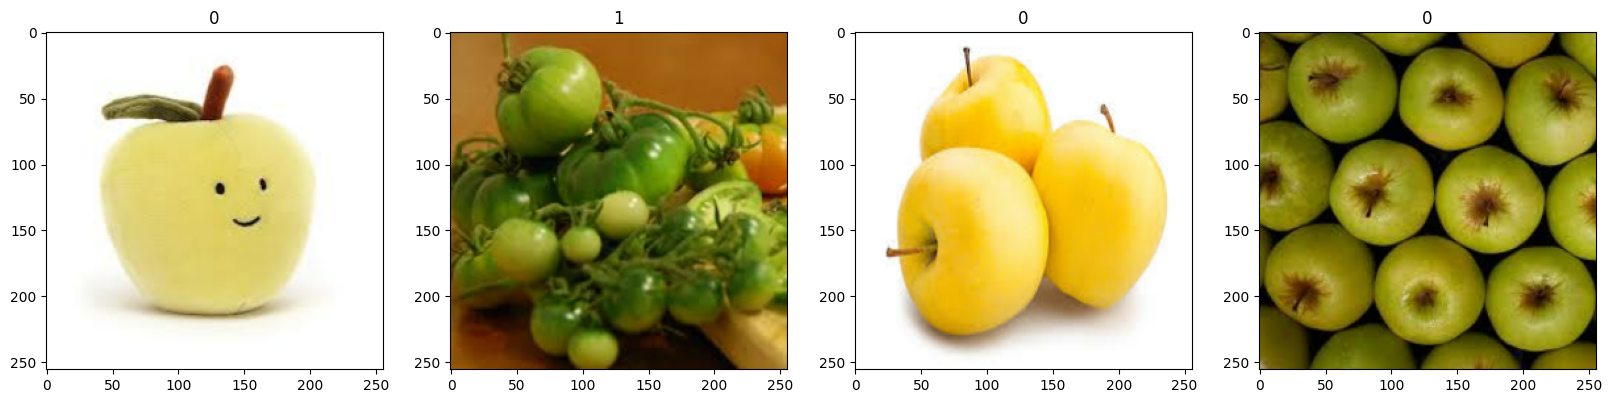

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

Preprocess data

In [12]:
#scale data
data = data.map(lambda x,y: (x/255, y))

In [13]:
scaled_iterator = data.as_numpy_iterator()

In [14]:
batch = scaled_iterator.next()

In [15]:
batch[0].max()

1.0

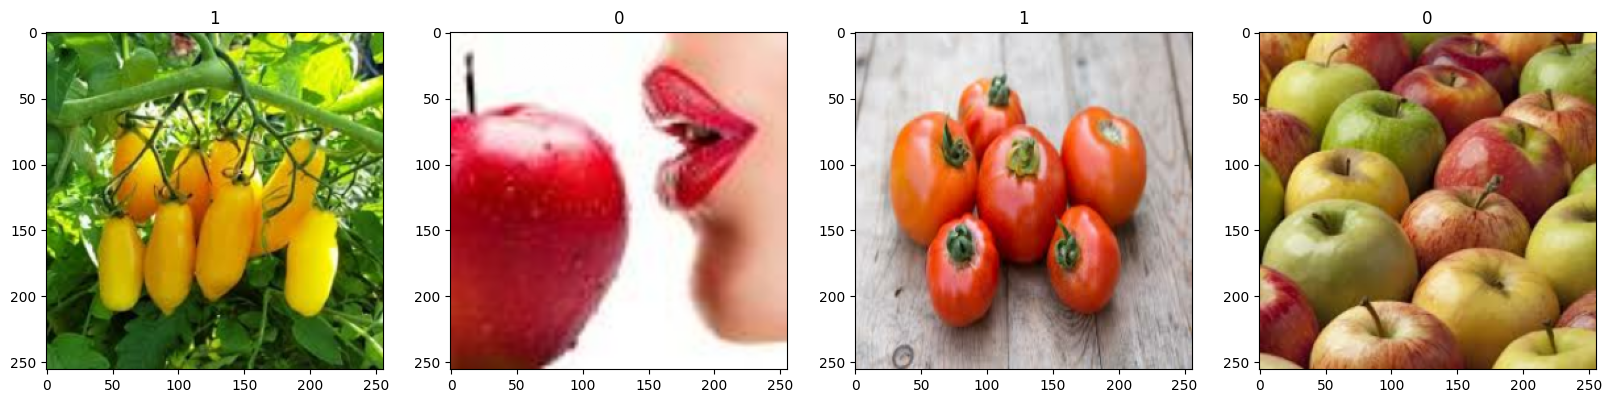

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build Deep Learning Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Train data

In [24]:
logdir = 'logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(data, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 [==============================] - 24s 2s/step - loss: 0.8095 - accuracy: 0.5442 - val_loss: 0.6422 - val_accuracy: 0.7344
Epoch 2/20
10/10 [==============================] - 18s 2s/step - loss: 0.6451 - accuracy: 0.6463 - val_loss: 0.6111 - val_accuracy: 0.6250
Epoch 3/20
10/10 [==============================] - 18s 2s/step - loss: 0.5837 - accuracy: 0.6769 - val_loss: 0.5524 - val_accuracy: 0.7656
Epoch 4/20
10/10 [==============================] - 18s 2s/step - loss: 0.5416 - accuracy: 0.7381 - val_loss: 0.4726 - val_accuracy: 0.7812
Epoch 5/20
10/10 [==============================] - 17s 2s/step - loss: 0.5220 - accuracy: 0.7279 - val_loss: 0.3720 - val_accuracy: 0.8438
Epoch 6/20
10/10 [==============================] - 18s 2s/step - loss: 0.4652 - accuracy: 0.8027 - val_loss: 0.3568 - val_accuracy: 0.8594
Epoch 7/20
10/10 [==============================] - 18s 2s/step - loss: 0.3682 - accuracy: 0.8639 - val_loss: 0.3120 - val_accuracy: 0.9219
Epoch 8/20
10/10 [==

Plot Performance

In [27]:
hist.history

{'loss': [0.8094981908798218,
  0.6450628638267517,
  0.5836963057518005,
  0.5416228771209717,
  0.522007405757904,
  0.46516817808151245,
  0.3682020306587219,
  0.30498743057250977,
  0.23223863542079926,
  0.20508186519145966,
  0.1258777379989624,
  0.10763245075941086,
  0.07593457400798798,
  0.04920737072825432,
  0.03343392163515091,
  0.017231294885277748,
  0.009205467067658901,
  0.0069194091483950615,
  0.0030295865144580603,
  0.0020847448613494635],
 'accuracy': [0.5442177057266235,
  0.646258533000946,
  0.6768707633018494,
  0.738095223903656,
  0.7278911471366882,
  0.8027210831642151,
  0.8639456033706665,
  0.8877550959587097,
  0.9217687249183655,
  0.9251700639724731,
  0.9591836929321289,
  0.9727891087532043,
  0.9931972622871399,
  0.9931972622871399,
  0.9897959232330322,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6421972513198853,
  0.6110752820968628,
  0.5524246096611023,
  0.4725583791732788,
  0.37199023365974426,
  0.3567657470703125,
  0.311962

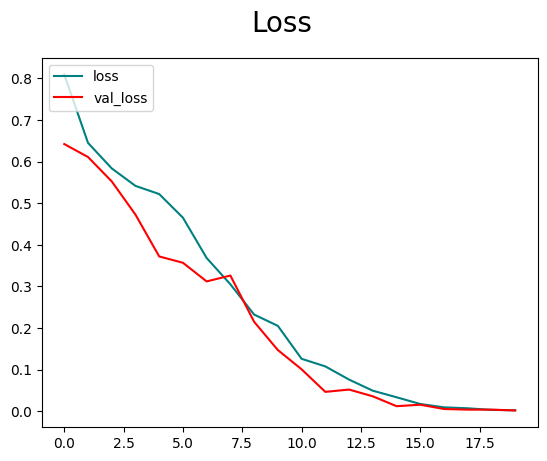

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

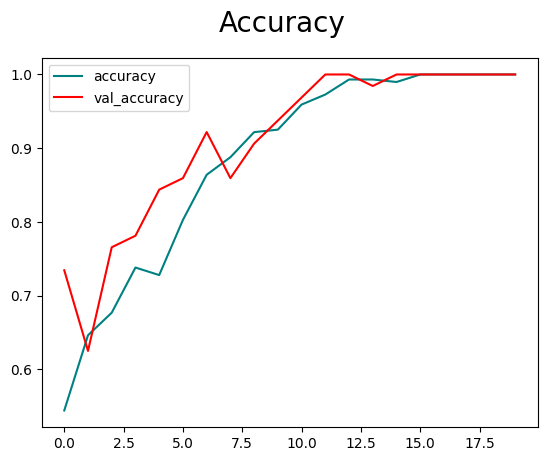

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate Performnace

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 192ms/step


In [36]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


Test

In [35]:
import cv2

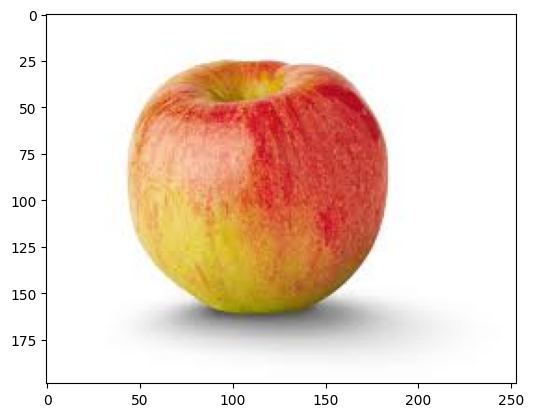

In [69]:
img = cv2.imread('apple_image.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

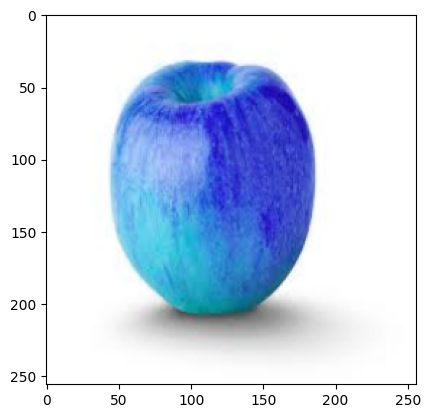

In [70]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [71]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 35ms/step


In [72]:
yhat

array([[0.11696478]], dtype=float32)

In [73]:
if yhat> 0.5:
  print(f'Predicted class is a tomato')
else:
  print(f'Predicted class is an apple')

Predicted class is an apple


Save model

In [46]:
from tensorflow.keras.models import load_model

In [47]:
model.save(os.path.join('models', 'appleortomato.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
new_model = load_model(os.path.join('models', 'appleortomato.h5'))

In [75]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [76]:
if yhat_new> 0.5:
  print(f'Predicted class is a tomato')
else:
  print(f'Predicted class is an apple')

Predicted class is an apple
